In [1]:
#
# Homework 01 (adults & income)
#

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import datasets
from sklearn.linear_model import LogisticRegression, LinearRegression
from sklearn.svm import SVC
from sklearn.preprocessing import LabelEncoder

In [3]:
# Load data from csv file

In [4]:
data = pd.read_csv('adult.csv', sep = ',')
data.head()

,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
0,25,Private,226802,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K
1,38,Private,89814,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K
2,28,Local-gov,336951,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K
3,44,Private,160323,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K
4,18,?,103497,Some-college,10,Never-married,?,Own-child,White,Female,0,0,30,United-States,<=50K


In [5]:
#
# Checking data for null and unique values
#

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48842 entries, 0 to 48841
Data columns (total 15 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   age              48842 non-null  int64 
 1   workclass        48842 non-null  object
 2   fnlwgt           48842 non-null  int64 
 3   education        48842 non-null  object
 4   educational-num  48842 non-null  int64 
 5   marital-status   48842 non-null  object
 6   occupation       48842 non-null  object
 7   relationship     48842 non-null  object
 8   race             48842 non-null  object
 9   gender           48842 non-null  object
 10  capital-gain     48842 non-null  int64 
 11  capital-loss     48842 non-null  int64 
 12  hours-per-week   48842 non-null  int64 
 13  native-country   48842 non-null  object
 14  income           48842 non-null  object
dtypes: int64(6), object(9)
memory usage: 5.6+ MB


In [7]:
print(f'Total lines: {len(data)}\n---')
for column_name in data.columns:
    empty_nm = len(data[pd.isnull(data[column_name])])
    if empty_nm: print(f'Empty values for {column_name}: {empty_nm}')

Total lines: 48842
---


In [8]:
print(f'Total columns: {len(data.columns)}\n---')
for column_name in data.columns:
    print(f'Column "{column_name}":\n{data[column_name].unique()}')

Total columns: 15
---
Column "age":
[25 38 28 44 18 34 29 63 24 55 65 36 26 58 48 43 20 37 40 72 45 22 23 54
 32 46 56 17 39 52 21 42 33 30 47 41 19 69 50 31 59 49 51 27 57 61 64 79
 73 53 77 80 62 35 68 66 75 60 67 71 70 90 81 74 78 82 83 85 76 84 89 88
 87 86]
Column "workclass":
['Private' 'Local-gov' '?' 'Self-emp-not-inc' 'Federal-gov' 'State-gov'
 'Self-emp-inc' 'Without-pay' 'Never-worked']
Column "fnlwgt":
[226802  89814 336951 ... 129912 255835 257302]
Column "education":
['11th' 'HS-grad' 'Assoc-acdm' 'Some-college' '10th' 'Prof-school'
 '7th-8th' 'Bachelors' 'Masters' 'Doctorate' '5th-6th' 'Assoc-voc' '9th'
 '12th' '1st-4th' 'Preschool']
Column "educational-num":
[ 7  9 12 10  6 15  4 13 14 16  3 11  5  8  2  1]
Column "marital-status":
['Never-married' 'Married-civ-spouse' 'Widowed' 'Divorced' 'Separated'
 'Married-spouse-absent' 'Married-AF-spouse']
Column "occupation":
['Machine-op-inspct' 'Farming-fishing' 'Protective-serv' '?'
 'Other-service' 'Prof-specialty' 'Craft-re

In [9]:
# there are some missing values with "?" sign - will remove them
print(f'Prev rows: {len(data)}')

data = data[data['workclass'] != '?']
data = data[data['occupation'] != '?']
data = data[data['native-country'] != '?']

print(f'Cleared data: {len(data)}')

Prev rows: 48842
Cleared data: 45222


In [10]:
le = LabelEncoder()

In [11]:
# prepare columns "gender, income" to numbers

le.fit(data['gender'])
data['gender'] = le.transform(data['gender'])

In [12]:
# View some total statistics

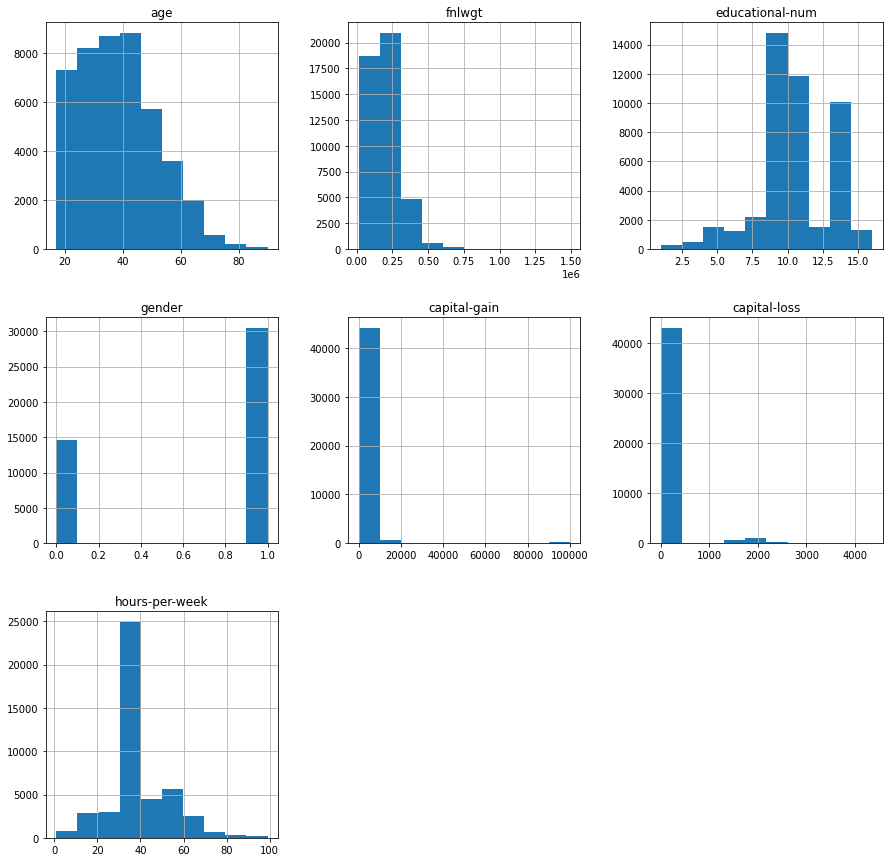

In [13]:
num_ix = data.select_dtypes(include=['int64', 'float64']).columns
subset = data[num_ix]
subset.hist(figsize=(15,15))
plt.show()

# TODO: don't know how to change int values back to strings at x-axis yet

In [14]:
# convert strings values to numbers
#

selected_columns = ['age', 'workclass', 'fnlwgt', 'educational-num', 'marital-status', 'occupation', 
                    'relationship', 'race', 'gender', 'capital-gain', 'capital-loss', 'hours-per-week', 
                    'native-country']

dummy_columns = ['workclass', 'marital-status', 'occupation', 'relationship', 'race', 'native-country']

X_total = pd.get_dummies(data[selected_columns], columns=dummy_columns)

le.fit(data['income'])
Y_total = pd.Series(data=le.transform(data['income']))


In [15]:
data_border = int(len(data)*0.66)

X_train = X_total[:data_border]
Y_train = Y_total[:data_border]

X_test = X_total[data_border:]
Y_test = Y_total[data_border:]

Y_train.head()

0    0
1    0
2    1
3    1
4    0
dtype: int64

In [16]:
X_train.head()

,age,fnlwgt,educational-num,gender,capital-gain,capital-loss,hours-per-week,workclass_Federal-gov,workclass_Local-gov,workclass_Private,...,native-country_Portugal,native-country_Puerto-Rico,native-country_Scotland,native-country_South,native-country_Taiwan,native-country_Thailand,native-country_Trinadad&Tobago,native-country_United-States,native-country_Vietnam,native-country_Yugoslavia
0,25,226802,7,1,0,0,40,0,0,1,...,0,0,0,0,0,0,0,1,0,0
1,38,89814,9,1,0,0,50,0,0,1,...,0,0,0,0,0,0,0,1,0,0
2,28,336951,12,1,0,0,40,0,1,0,...,0,0,0,0,0,0,0,1,0,0
3,44,160323,10,1,7688,0,40,0,0,1,...,0,0,0,0,0,0,0,1,0,0
5,34,198693,6,1,0,0,30,0,0,1,...,0,0,0,0,0,0,0,1,0,0


In [17]:
X_test.head()

,age,fnlwgt,educational-num,gender,capital-gain,capital-loss,hours-per-week,workclass_Federal-gov,workclass_Local-gov,workclass_Private,...,native-country_Portugal,native-country_Puerto-Rico,native-country_Scotland,native-country_South,native-country_Taiwan,native-country_Thailand,native-country_Trinadad&Tobago,native-country_United-States,native-country_Vietnam,native-country_Yugoslavia
32243,21,409230,9,1,0,0,40,0,0,1,...,0,0,0,0,0,0,0,0,0,0
32244,38,376025,4,1,0,0,40,0,0,1,...,0,0,0,0,0,0,0,1,0,0
32245,55,80167,13,0,0,0,40,0,0,1,...,0,0,0,0,0,0,0,1,0,0
32246,39,99357,14,0,1506,0,40,0,0,1,...,0,0,0,0,0,0,0,1,0,0
32247,24,82847,9,0,0,0,50,0,0,1,...,1,0,0,0,0,0,0,0,0,0


In [18]:
model_logistic = LogisticRegression(max_iter=1e6)
model_svc_poly = SVC(kernel='poly', probability=True)
model_svc_default = SVC(probability=True)

In [19]:
#X_train.columns

In [20]:
model_logistic.fit(X_train, Y_train)

LogisticRegression(max_iter=1000000.0)

In [21]:
predictions = model_logistic.predict_proba(X_train)
predictions[:5]

array([[0.78684741, 0.21315259],
       [0.73499651, 0.26500349],
       [0.84693409, 0.15306591],
       [0.21356589, 0.78643411],
       [0.76695296, 0.23304704]])

In [22]:
model_logistic.predict(X_train)

array([0, 0, 0, ..., 0, 0, 0])

In [23]:
model_logistic.predict(X_test)

array([0, 0, 0, ..., 0, 0, 1])

In [24]:
model_logistic.score(X_train, Y_train)

0.7915298532466662

In [25]:
model_logistic.score(X_test, Y_test)

0.7917533818938606

In [26]:
#
# View linear regressions for each column
#

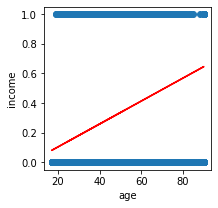

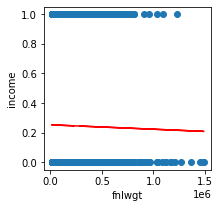

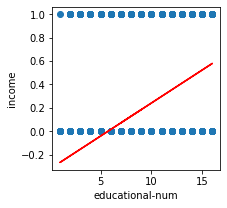

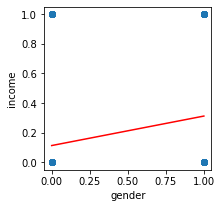

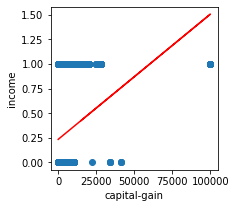

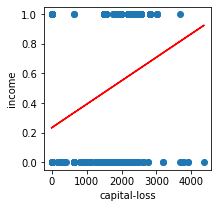

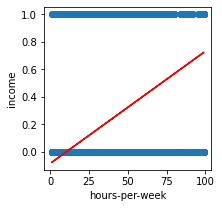

In [27]:
regr = LinearRegression()
for column_name in data.select_dtypes(include=['int64', 'float64']).columns:
    if column_name != 'income':
        X_line = data[[column_name]]
        regr.fit(X_line, Y_total)
        y_predict = regr.predict(X_line)

        plt.figure(figsize=(3,3))

        plt.xlabel(column_name)
        plt.ylabel('income')

        plt.scatter(X_line, Y_total, marker='o')
        plt.plot(X_line, y_predict, color = 'red', markersize = 3)
        plt.show()

In [28]:
model_svc_poly.fit(X_train, Y_train)

SVC(kernel='poly', probability=True)

In [29]:
model_svc_poly.predict(X_train)

array([0, 0, 0, ..., 0, 0, 0])

In [30]:
model_svc_poly.score(X_train, Y_train)

0.773973061716813

In [31]:
###

model_svc_default.fit(X_train, Y_train)

SVC(probability=True)

In [32]:
model_svc_default.predict(X_train)

array([0, 0, 0, ..., 0, 0, 0])

In [33]:
model_svc_poly.score(X_train, Y_train)

0.773973061716813

In [34]:
###

model_logistic.predict_proba(X_train)[115:120]

array([[0.73453122, 0.26546878],
       [0.75209174, 0.24790826],
       [0.41932559, 0.58067441],
       [0.8923822 , 0.1076178 ],
       [0.79799902, 0.20200098]])

In [35]:
model_svc_poly.predict_proba(X_train)[115:120]

array([[0.77987999, 0.22012001],
       [0.77988033, 0.22011967],
       [0.76485084, 0.23514916],
       [0.77963586, 0.22036414],
       [0.77982472, 0.22017528]])

In [36]:
model_svc_default.predict_proba(X_train)[115:120]

array([[0.79249909, 0.20750091],
       [0.79245035, 0.20754965],
       [0.78342143, 0.21657857],
       [0.79226541, 0.20773459],
       [0.79226572, 0.20773428]])

In [37]:
#
# Check on test_data
#

In [38]:
model_logistic.score(X_test, Y_test)

0.7917533818938606

In [39]:
model_svc_poly.predict(X_test)

array([0, 0, 0, ..., 0, 0, 1])

In [40]:
model_svc_poly.score(X_test, Y_test)

0.771917273673257

In [41]:
model_svc_default.predict(X_test)

array([0, 0, 0, ..., 0, 0, 1])

In [42]:
model_svc_default.score(X_test, Y_test)

0.7878511966701353